See wavelets families and get their names

In [4]:
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

Wavelet object and properties

In [5]:
w = pywt.Wavelet('db3')
print(w)

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [6]:
print(w.filter_bank) #print 4 filter coefficient
print(w.dec_lo, w.dec_hi, w.rec_lo, w.rec_hi)

([0.03522629188570953, -0.08544127388202666, -0.13501102001025458, 0.45987750211849154, 0.8068915093110925, 0.33267055295008263], [-0.33267055295008263, 0.8068915093110925, -0.45987750211849154, -0.13501102001025458, 0.08544127388202666, 0.03522629188570953], [0.33267055295008263, 0.8068915093110925, 0.45987750211849154, -0.13501102001025458, -0.08544127388202666, 0.03522629188570953], [0.03522629188570953, 0.08544127388202666, -0.13501102001025458, -0.45987750211849154, 0.8068915093110925, -0.33267055295008263])
[0.03522629188570953, -0.08544127388202666, -0.13501102001025458, 0.45987750211849154, 0.8068915093110925, 0.33267055295008263] [-0.33267055295008263, 0.8068915093110925, -0.45987750211849154, -0.13501102001025458, 0.08544127388202666, 0.03522629188570953] [0.33267055295008263, 0.8068915093110925, 0.45987750211849154, -0.13501102001025458, -0.08544127388202666, 0.03522629188570953] [0.03522629188570953, 0.08544127388202666, -0.13501102001025458, -0.45987750211849154, 0.8068915

Creation of homemade wavelets, two ways

In [4]:
class MyHaarFilterBank(object):
     @property
     def filter_bank(self):
         from math import sqrt
         return ([sqrt(2)/2, sqrt(2)/2], [-sqrt(2)/2, sqrt(2)/2],
                 [sqrt(2)/2, sqrt(2)/2], [sqrt(2)/2, -sqrt(2)/2])
    
my_wavelet = pywt.Wavelet('My Haar Wavelet', filter_bank=MyHaarFilterBank())

In [6]:
from math import sqrt
my_filter_bank = ([sqrt(2)/2, sqrt(2)/2], [-sqrt(2)/2, sqrt(2)/2],[sqrt(2)/2, sqrt(2)/2], [sqrt(2)/2, -sqrt(2)/2])
my_wavelet = pywt.Wavelet('My Haar Wavelet', filter_bank=my_filter_bank)

Then, change arguments if necessary

In [7]:
my_wavelet.orthogonal = True

In [7]:
(phi_d, psi_d, phi_r, psi_r, x) = my_wavelet.wavefun(level=5)
print(phi_d)
print(phi_r)

NameError: name 'my_wavelet' is not defined

### Discrete wavelet transform

Single level decomposition

In [11]:
import numpy as np
import pywt

w = pywt.Wavelet('db3')
data = np.random.rand(200)
(x,y) = pywt.dwt(data, w)
print(np.shape(x))
print(np.shape(y))

(102,)
(102,)


Multi level decomposition

(16,)
(16,)
(27,)


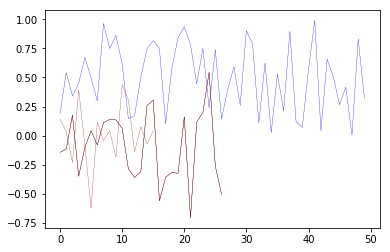

In [34]:
from pywt import wavedec

x,y,z = wavedec(data, w, level=2)
print(np.shape(x))
print(np.shape(y))
print(np.shape(z))

plt.plot(data, color='blue', lw=0.3)
plt.plot(z, color='red', lw=0.3)
plt.plot(y, color='brown', lw=0.3)
plt.plot(z, color='black', lw=0.3)

plt.show()

### Inverse discrete wavelet transform

<font color='red'> What is difference with pywt.upcoef ? 

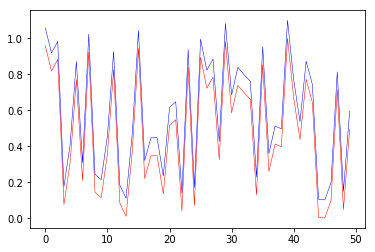

[ -1.11022302e-16   1.11022302e-16   0.00000000e+00  -8.32667268e-17
  -5.55111512e-17  -1.11022302e-16   0.00000000e+00  -1.11022302e-16
   0.00000000e+00   1.38777878e-17  -5.55111512e-17   0.00000000e+00
  -2.77555756e-17  -2.77555756e-17   5.55111512e-17  -1.11022302e-16
   2.77555756e-17  -5.55111512e-17  -5.55111512e-17   0.00000000e+00
  -1.11022302e-16  -1.11022302e-16   5.55111512e-17  -1.11022302e-16
  -1.11022302e-16  -1.11022302e-16  -1.11022302e-16  -1.11022302e-16
   0.00000000e+00   1.11022302e-16   0.00000000e+00  -1.11022302e-16
   0.00000000e+00  -1.11022302e-16  -5.55111512e-17   0.00000000e+00
   0.00000000e+00  -1.11022302e-16  -1.11022302e-16  -1.11022302e-16
  -1.11022302e-16   1.11022302e-16   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -2.77555756e-17   2.77555756e-17  -1.11022302e-16
   0.00000000e+00   0.00000000e+00]


In [28]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
data = np.random.rand(50)
(cA, cD) = pywt.dwt(data, 'db2', 'smooth')
dataRec = pywt.idwt(cA, cD, 'db2', 'smooth')
plt.plot(dataRec, color='red', lw=0.5)
plt.plot(data+0.1, color='blue', lw=0.5)
plt.show()
print(data-dataRec)

One of the neat features of idwt() is that one of the cA and cD arguments can be set to None. In that situation the reconstruction will be performed using only the other one.  Mathematically speaking, this is equivalent to passing a zero-filled array as one of the arguments.

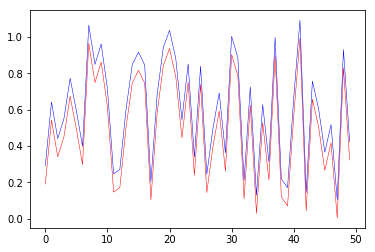

[ -2.77555756e-17  -1.11022302e-16  -5.55111512e-17  -5.55111512e-17
  -1.11022302e-16   0.00000000e+00  -5.55111512e-17   0.00000000e+00
  -1.11022302e-16  -1.11022302e-16  -1.11022302e-16   2.77555756e-17
  -2.77555756e-17   0.00000000e+00   0.00000000e+00  -1.11022302e-16
  -1.11022302e-16  -8.32667268e-17  -1.11022302e-16  -2.22044605e-16
   0.00000000e+00  -1.11022302e-16   0.00000000e+00  -1.11022302e-16
  -1.11022302e-16  -2.22044605e-16   0.00000000e+00   0.00000000e+00
  -1.11022302e-16  -1.11022302e-16  -1.11022302e-16   0.00000000e+00
   0.00000000e+00  -1.11022302e-16   5.55111512e-17  -1.11022302e-16
  -5.55111512e-17  -1.11022302e-16   2.77555756e-17   0.00000000e+00
   0.00000000e+00  -1.11022302e-16  -1.11022302e-16   0.00000000e+00
   0.00000000e+00  -1.11022302e-16  -5.55111512e-17   8.32667268e-17
  -1.11022302e-16   0.00000000e+00]


In [30]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
data = np.random.rand(50)
(cA, cD) = pywt.dwt(data, 'db2', 'smooth')
dataRec = pywt.idwt(cA, cD, 'db2', 'smooth')



(cA, cD) = pywt.dwt(data, 'db2', 'smooth')
A = pywt.idwt(cA, None, 'db2', 'smooth')
D = pywt.idwt(None, cD, 'db2', 'smooth')
dataRec = A+D
plt.plot(dataRec, color='red', lw=0.5)
plt.plot(data+0.1, color='blue', lw=0.5)
plt.show()
print(data-dataRec)